<a href="https://colab.research.google.com/github/zxst/ML-Yearning/blob/master/CNN_knowledge_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline:
## 1.先来回顾上节课内容（全连接神经网络）
## 2.为什么要用卷积
## 3.卷积是怎么卷的
## 4.典型的卷积网络长什么样
## 5.从头build一个CNN来进行一个简单的分类任务
## 6.使用一些方法来提升模型的表现
## 7.换个思路：从数据上着手
## 8.进一步提升：借助预训练的模型进行预测
## 9.最后给大家看看神奇的卷积卷出来的到底是什么


# 1 全连接神经网络


*   Input (shape?)
*   Hidden Layer
*   Activation
*   Output
*   Loss function
*   Model loss
*   Backpropagation
*   SGD
*   When to stop?


In [2]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu',input_shape=(784,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer = 'rmsprop',
              loss = 'crossentropy',
              metrics = ['acc'])

# 2 为什么要用卷积

# 3 卷积是怎么实现的  


---


从最简单的例子开始
![alt text](https://cdn.nlark.com/yuque/0/2019/gif/160603/1551078820438-5ffec5ec-c32e-40db-afbb-00fe98daca0c.gif)
![alt text](https://cdn.nlark.com/yuque/0/2019/gif/160603/1551078963956-2b10263c-3be8-49e1-a2a5-c3f78dbda32c.gif)  


---


然后引入了padding的概念，也就是往边缘填充

![alt text](https://cdn.nlark.com/yuque/0/2019/gif/160603/1551079167251-cfad5f66-158f-4a19-b4e7-4c851289df7e.gif)



---

再加入步幅(stride)  
![alt text](https://cdn.nlark.com/yuque/0/2019/gif/160603/1551079167251-3fecfd2c-275e-4db9-82e4-c196a8277b47.gif)


---

大多数时候，我们处理的图像是三通道的。所以，多通道版本  ：  
![alt text](https://cdn.nlark.com/yuque/0/2019/jpeg/160603/1551084127859-6910b20d-f5b0-45ec-9f87-b23c080472e3.jpeg)  

对于这种问题，我们的卷积核也是又多个通道的：  
![alt text](https://cdn.nlark.com/yuque/0/2019/png/160603/1551084127737-da485393-3832-482c-991d-ede09a5a92fc.png)  

两种方式帮助大家理解多通道卷积是怎么计算的：  
1.逐层划过  
2.所有channels 同时划过  
############   
逐层划过  
![alt text](https://cdn.nlark.com/yuque/0/2019/gif/160603/1551084128079-20f991f4-c2f8-4bba-b2d8-35dcd08918c2.gif)  
![alt text](https://cdn.nlark.com/yuque/0/2019/gif/160603/1551084127732-999f2db5-8c99-4c7c-b806-11db1fb23b6c.gif)  

############  
所有channels 同时划过  
![](https://cdn.nlark.com/yuque/0/2019/png/160603/1551085717619-c138a71c-07de-42c7-b5f2-a879306dac9f.png)  

但是直到这我们也只实现了一层的feature map, 想实现多层怎么办：  
![](https://cdn.nlark.com/yuque/0/2019/png/160603/1551085717309-91a2b53f-4dae-475e-b910-e100c96d7824.png)    

最后再介绍三种卷积：  
1X1卷积  
![](https://cdn.nlark.com/yuque/0/2019/png/160603/1551085717557-3677cf4e-1a23-4770-997a-37c1bb8dc156.png)    

3D卷积  
![](https://cdn.nlark.com/yuque/0/2019/png/160603/1551085717450-a965a7f7-3ac1-4e54-acd1-2ad68f1b4b6b.png)  

深度可分离卷积：  

![](https://cdn.nlark.com/yuque/0/2019/png/160603/1551087905655-6c625bdd-f9e1-4984-b90f-8e56de40026d.png)



# 4 典型的卷积网络长什么样  
给大家看一个很早期的LeNet, 很经典的一个网络架构  

![alt text](http://img.mp.itc.cn/upload/20170416/b41478d96ef340289d24dc78bdffb0f1_th.jpeg)


In [1]:
# 现在我们来重现以下这个网络看看对不对
from keras import layers
from keras import models


model_lenet = models.Sequential()
model_lenet.add(layers.Conv2D(6,(5,5), activation='relu', input_shape = (32,32,1)))
model_lenet.add(layers.MaxPooling2D(2,2))
model_lenet.add(layers.Conv2D(16,(5,5),activation='relu'))
model_lenet.add(layers.MaxPooling2D(2,2))
model_lenet.add(layers.Flatten())
model_lenet.add(layers.Dense(120,activation='relu'))
model_lenet.add(layers.Dense(84,activation='relu'))
model_lenet.add(layers.Dense(10,activation='softmax'))

model_lenet.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dens

In [0]:
from keras.utils import plot_model
plot_model(model_lenet, show_shapes=True, to_file='model.png')

# 5 从头build一个CNN来进行一个简单的分类任务
一个超级简单的图像分类任务猫狗分类。 通过这个任务，大家可以看出怎么使用CNN来解决现实问题。


## Load the data

In [7]:
# 首先我们获取数据

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2019-02-26 07:21:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  54.0MB/s    in 1.2s    

2019-02-26 07:21:21 (54.0 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/sample_data')
zip_ref.close()

In [9]:
os.listdir('sample_data/cats_and_dogs_filtered')

['validation', 'train', 'vectorize.py']

In [10]:
print('training cat images',len(os.listdir('sample_data/cats_and_dogs_filtered/train/cats')))
print('training dog images',len(os.listdir('sample_data/cats_and_dogs_filtered/train/dogs')))

print('validation cat images',len(os.listdir('sample_data/cats_and_dogs_filtered/validation/cats')))
print('validation dog images',len(os.listdir('sample_data/cats_and_dogs_filtered/validation/dogs')))

training cat images 1000
training dog images 1000
validation cat images 500
validation dog images 500


In [0]:
#这时候我们从validation folder 中分出250个创建一个test folder
import shutil

base_dir = '/content/sample_data/cats_and_dogs_filtered'

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(base_dir, 'train/cats')
train_dogs_dir = os.path.join(base_dir, 'train/dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

validation_cats_dir = os.path.join(base_dir, 'validation/cats')
validation_dogs_dir = os.path.join(base_dir, 'validation/dogs')

fnames_cats = os.listdir(validation_cats_dir)[0:250]
fnames_dogs = os.listdir(validation_dogs_dir)[0:250]

for fname_cats, fname_dogs in zip(fnames_cats, fnames_dogs):
  src_cats = os.path.join(validation_cats_dir, fname_cats)
  src_dogs = os.path.join(validation_dogs_dir, fname_dogs)
  
  dst_cats = os.path.join(test_cats_dir, fname_cats)
  dst_dogs = os.path.join(test_dogs_dir, fname_dogs)
  
  shutil.move(src_cats, dst_cats)
  shutil.move(src_dogs, dst_dogs)

In [6]:
print('training cat images:', len(os.listdir(train_cats_dir)))
print('training dog images:', len(os.listdir(train_dogs_dir)))
print('validation cat images:', len(os.listdir(validation_cats_dir)))
print('validation dog images:', len(os.listdir(validation_dogs_dir)))
print('test cat images:', len(os.listdir(test_cats_dir)))
print('test dog images:', len(os.listdir(test_dogs_dir)))

training cat images: 1000
training dog images: 1000
validation cat images: 250
validation dog images: 250
test cat images: 250
test dog images: 250


## 数据预处理
如何将.jpg数据处理成模型的input(tensor)?


1.   Read the image
2.   Decode the .jpg file to RGB format
3.   Convert RGB format to tensor
4.   Normalization the data to [0-1]

在这个案例里，我们使用keras.preprocessing.image中的ImageDataGenerator函数，创建一个生成器，来将jpg转化为tensor


In [0]:
def gnt():
  for i in range(1000):
      yield i

In [0]:
g=gnt()


In [48]:
#next 
next(g)

4

In [49]:
#for
for data in gnt():
  print(data)
  break

0


In [12]:
# 以上为生成器的介绍，下面我们构建数据预处理的生成器
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
# Now we can see the output of the generator
# But how can we know which class is 0/1
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  
  print('labels batch shape:', labels_batch.shape)
  print(labels_batch)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
[0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]


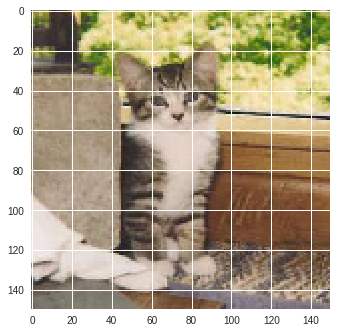

In [14]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
plt.imshow(image.array_to_img(data_batch[0]))

In [0]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
# 配置我们的模型
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 1e-4),
              metrics = ['acc'])

In [15]:
# 训练模型
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 25)

# 随手保存模型是一个好习惯
model.save('cat_dog_small_1.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 14s 143ms/step - loss: 0.6870 - acc: 0.5400 - val_loss: 0.6607 - val_acc: 0.6440
Epoch 2/30
100/100 [==============================] - 9s 88ms/step - loss: 0.6583 - acc: 0.6045 - val_loss: 0.6280 - val_acc: 0.6760
Epoch 3/30
100/100 [==============================] - 9s 86ms/step - loss: 0.6035 - acc: 0.6745 - val_loss: 0.5814 - val_acc: 0.6980
Epoch 4/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5692 - acc: 0.6980 - val_loss: 0.5778 - val_acc: 0.7020
Epoch 5/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5403 - acc: 0.7165 - val_loss: 0.5584 - val_acc: 0.7260
Epoch 6/30
100/100 [==============================] - 8s 85ms/step - loss: 0.5102 - acc: 0.7495 - val_loss: 0.5487 - val_acc: 0.7100
Epoch 7/30
100/100 [==============================] - 9s 86ms/step - loss: 0.4878 - acc: 0.7650 - val_loss: 0.5553 - val_acc: 0.7060
Epoch 8/30
100/100 

In [16]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

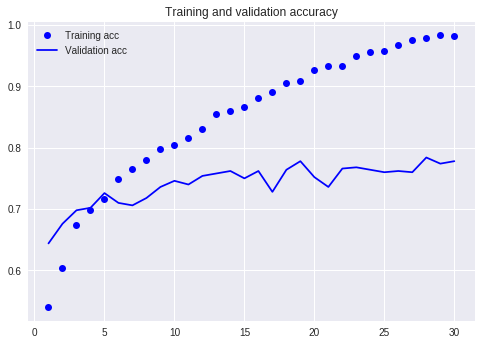

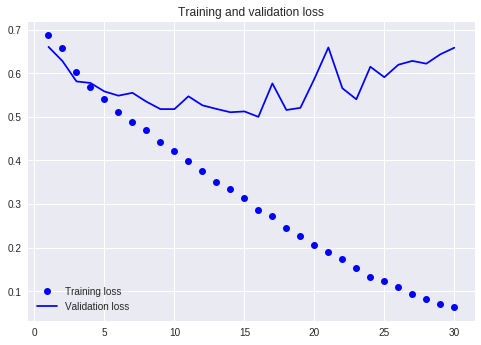

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()